### Import Packages and Data

In [36]:
import csv
import pandas as pd
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt


In [2]:
retail_data = pd.read_csv("Data/retail_price.csv") #676*30

# EDA

In [13]:
retail_data.head().T

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


In [12]:
pd.DataFrame(retail_data.describe()).T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [5]:
pd.DataFrame(
    [retail_data.dtypes,
     retail_data.nunique()],
     index=["datatype","unique_values"]
).T


,datatype,unique_values
product_id,object,52
product_category_name,object,9
month_year,object,20
qty,int64,66
total_price,float64,573
freight_price,float64,653
unit_price,float64,280
product_name_lenght,int64,24
product_description_lenght,int64,46
product_photos_qty,int64,7


In [45]:
#retail_data['product_category_name'].value_counts().to_frame().boxplot()

In [46]:
#retail_data[retail_data['qty']>retail_data['customers']][['product_category_name','qty', 'total_price', 'unit_price', 'customers','comp_1']]
visualize = retail_data[['product_id','product_category_name','qty','unit_price', 'freight_price','customers','comp_1','fp1']]

visualize[visualize['product_category_name']=='perfumery']
#product_count = retail_data['product_id'].value_counts().to_frame()s

,product_id,product_category_name,qty,unit_price,freight_price,customers,comp_1,fp1
93,perfumery1,perfumery,4,56.990000,18.452500,4,56.990000,18.452500
94,perfumery1,perfumery,7,56.990000,11.750000,7,56.990000,11.750000
95,perfumery1,perfumery,7,56.990000,13.588571,8,56.990000,13.588571
96,perfumery1,perfumery,17,56.990000,13.741176,18,56.990000,13.741176
97,perfumery1,perfumery,17,56.990000,12.292941,19,56.990000,12.292941
98,perfumery1,perfumery,20,56.990000,12.714000,27,56.990000,12.714000
99,perfumery1,perfumery,24,56.990000,13.820000,34,56.990000,13.820000
100,perfumery1,perfumery,10,56.990000,12.215000,15,56.990000,12.215000
101,perfumery1,perfumery,4,56.990000,14.557500,12,56.990000,14.557500
102,perfumery1,perfumery,14,50.490000,15.196429,18,50.490000,15.196429


In [5]:
data2017 = retail_data[retail_data['year']==2017]
cat_2017_count = data2017['product_id'].value_counts()
cat_2017_count[cat_2017_count >= 5].index

Index(['health7', 'health5', 'bed2', 'health9', 'cool1', 'computers4',
       'garden3', 'garden1', 'garden5', 'garden9', 'garden2', 'watches1',
       'cool5', 'health8', 'cool2', 'computers1', 'bed1', 'garden6',
       'garden10', 'computers3', 'garden7', 'watches6', 'watches3', 'watches2',
       'perfumery1', 'garden8', 'consoles2', 'garden4', 'consoles1',
       'watches7', 'health2', 'furniture1', 'furniture2', 'bed5', 'furniture3',
       'watches5', 'perfumery2', 'health1', 'cool4'],
      dtype='object', name='product_id')

In [32]:
data2017_5plus = data2017[data2017['product_id'].isin(cat_2017_count[cat_2017_count >= 5].index)]
data2017_5plus=data2017_5plus.reset_index(drop=True)

In [7]:
## Estimated qty based on price vs real qty

In [13]:
real_qty = data2017_5plus[['qty']]

In [59]:
est_qty = []
for row in range(len(data2017_5plus)):
    demand = data2017_5plus['customers'][row]
    price = data2017_5plus['unit_price'][row]
    C1 = data2017_5plus['comp_1'][row]
    C2 = data2017_5plus['comp_2'][row]
    C3 = data2017_5plus['comp_3'][row]
    avg_c = (C1+C2+C3)/3
    #print(demand, math.exp(-price/avg_c)**2)
    est_qty.append(demand*math.exp(-price/avg_c)**2)

#demand[i,t]*exp(-(3*Z[i,t]/(C1[i,t]+C2[i,t]+C3[i,t])))^2

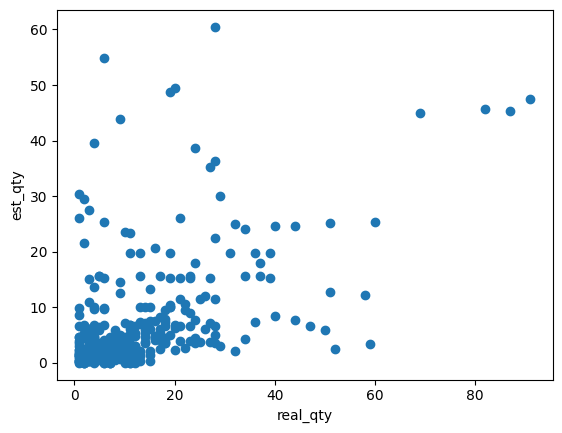

In [60]:
plt.scatter(real_qty,est_qty)
plt.xlabel('real_qty')
plt.ylabel('est_qty')
plt.show()

In [56]:
data2017_5plus.columns.tolist();

In [3]:
# Filter needed column
data2017_5plus_df = data2017_5plus[['product_id','qty','freight_price','unit_price','customers',
 'month', 'comp_1', 'fp1', 'comp_2', 'fp2', 'comp_3', 'fp3']]

# Get the count of product id and months
product_ids = data2017_5plus_df['product_id'].unique() #39
months = data2017_5plus_df['month'].unique() #12

# Create the full dataframe and fill in the existed data
all_combinations = pd.DataFrame(list(itertools.product(product_ids, months)), columns=['product_id', 'month']) #39*12
df_skeleton = pd.merge(all_combinations, data2017_5plus_df, on=['product_id', 'month'], how='left')

NameError: name 'data2017_5plus' is not defined

In [17]:
filled_df = df_skeleton

In [18]:
# function to fill in columns
def fill_in_data(df, col_to_fill, type):
    #get the min and max value for each of the product id
    min_max_value = data2017_5plus_df.groupby('product_id')[col_to_fill].agg(['min', 'max']).reset_index()
    
    df = pd.merge(df, min_max_value, on='product_id', how='left')
    if type == 'int':
        df[col_to_fill] = df.apply(lambda row: np.random.randint(row['min'], row['max']) if pd.isnull(row[col_to_fill]) else row[col_to_fill], axis=1)
    elif type == 'float':
        df[col_to_fill] = df.apply(lambda row: np.random.uniform(row['min'], row['max']) if pd.isnull(row[col_to_fill]) else row[col_to_fill], axis=1)
    
    df.drop(['min', 'max'], axis=1, inplace=True)
    
    return df

In [19]:
cont_columns_to_fill = ['freight_price','unit_price','comp_1','fp1','comp_2','fp2','comp_3','fp3']
int_col_to_fill = ['qty','customers']

for col in int_col_to_fill:
    filled_df = fill_in_data(filled_df, col, 'int')

for col in cont_columns_to_fill:
    filled_df = fill_in_data(filled_df, col, 'float')

filled_df

,product_id,month,qty,freight_price,unit_price,customers,comp_1,fp1,comp_2,fp2,comp_3,fp3
0,bed1,5,1.0,15.100000,45.950000,57.0,89.9,15.011897,215.000000,8.760000,45.95,15.100000
1,bed1,6,3.0,12.933333,45.950000,61.0,89.9,14.769216,209.000000,21.322000,45.95,12.933333
2,bed1,7,6.0,14.840000,45.950000,123.0,89.9,13.993833,205.000000,22.195932,45.95,14.840000
3,bed1,8,4.0,14.287500,45.950000,90.0,89.9,14.656757,199.509804,19.412885,45.95,14.287500
4,bed1,9,2.0,15.100000,45.950000,54.0,89.9,18.776522,163.398710,24.324687,45.95,15.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
463,bed5,12,23.0,15.206073,174.465613,76.0,89.9,15.560559,198.150256,22.691810,45.95,14.655043
464,bed5,3,41.0,19.920284,199.012478,83.0,89.9,17.790667,204.497307,15.117464,45.95,13.852660
465,bed5,4,34.0,23.797529,202.531508,77.0,89.9,16.000847,178.017681,22.752341,45.95,13.414513
466,bed5,2,16.0,9.812323,165.681554,108.0,89.9,16.081965,167.436192,22.187610,45.95,13.700750


In [20]:
# Sort the DataFrame by 'product' and then by the custom-ordered 'month'
filled_df = filled_df.sort_values(by=['product_id', 'month'])
filled_df

,product_id,month,qty,freight_price,unit_price,customers,comp_1,fp1,comp_2,fp2,comp_3,fp3
11,bed1,1,1.0,14.733143,43.639727,73.0,89.887115,18.630819,65.205484,23.245041,40.987426,15.716820
10,bed1,2,5.0,14.364058,45.475562,97.0,89.884339,17.453099,185.687425,18.999624,43.728723,13.010678
8,bed1,3,10.0,14.037033,45.687827,93.0,88.882245,20.466866,54.836493,18.038615,41.347904,15.092544
9,bed1,4,3.0,14.194927,45.936346,45.0,89.807159,17.388698,196.198205,13.536965,41.089674,13.318322
0,bed1,5,1.0,15.100000,45.950000,57.0,89.900000,15.011897,215.000000,8.760000,45.950000,15.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
423,watches7,8,2.0,13.845000,339.000000,48.0,160.669231,15.185385,339.000000,13.845000,179.900000,14.926667
424,watches7,9,1.0,13.940000,339.000000,54.0,148.778571,14.041111,339.000000,13.940000,164.570000,19.528000
425,watches7,10,10.0,13.455000,346.158000,43.0,134.900000,6.810000,346.158000,13.455000,232.490000,14.212500
426,watches7,11,9.0,14.275556,345.706667,91.0,133.000000,19.916667,108.000000,15.908462,174.433333,20.992778


In [113]:
filled_df.to_csv('Data/generated_data_complete.csv')